# `uarray` NumPy Compatability

In [1]:
from uarray import *
import numpy as np
import numba

## Original Expression

Let's look at this simple NumPy expression of calling the outer production of two values and then indexing it:

In [2]:
def some_fn(a, b):
    return np.multiply.outer(a, b)[5]

We can see that this does a lot of extra work, since we discard most of the results of the outer product after indexing. We can look at the time:

In [3]:
args = [np.arange(10000), np.arange(10000)]

In [4]:
some_fn(*args)

array([    0,     5,    10, ..., 49985, 49990, 49995])

In [5]:
# NBVAL_IGNORE_OUTPUT
%timeit some_fn(*args)

747 ms ± 50 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Uarray reduced

Now let's use uarray's `jit` decorator to create an updated function that specifes the dimensionality of the arrays to produced an optimized form:

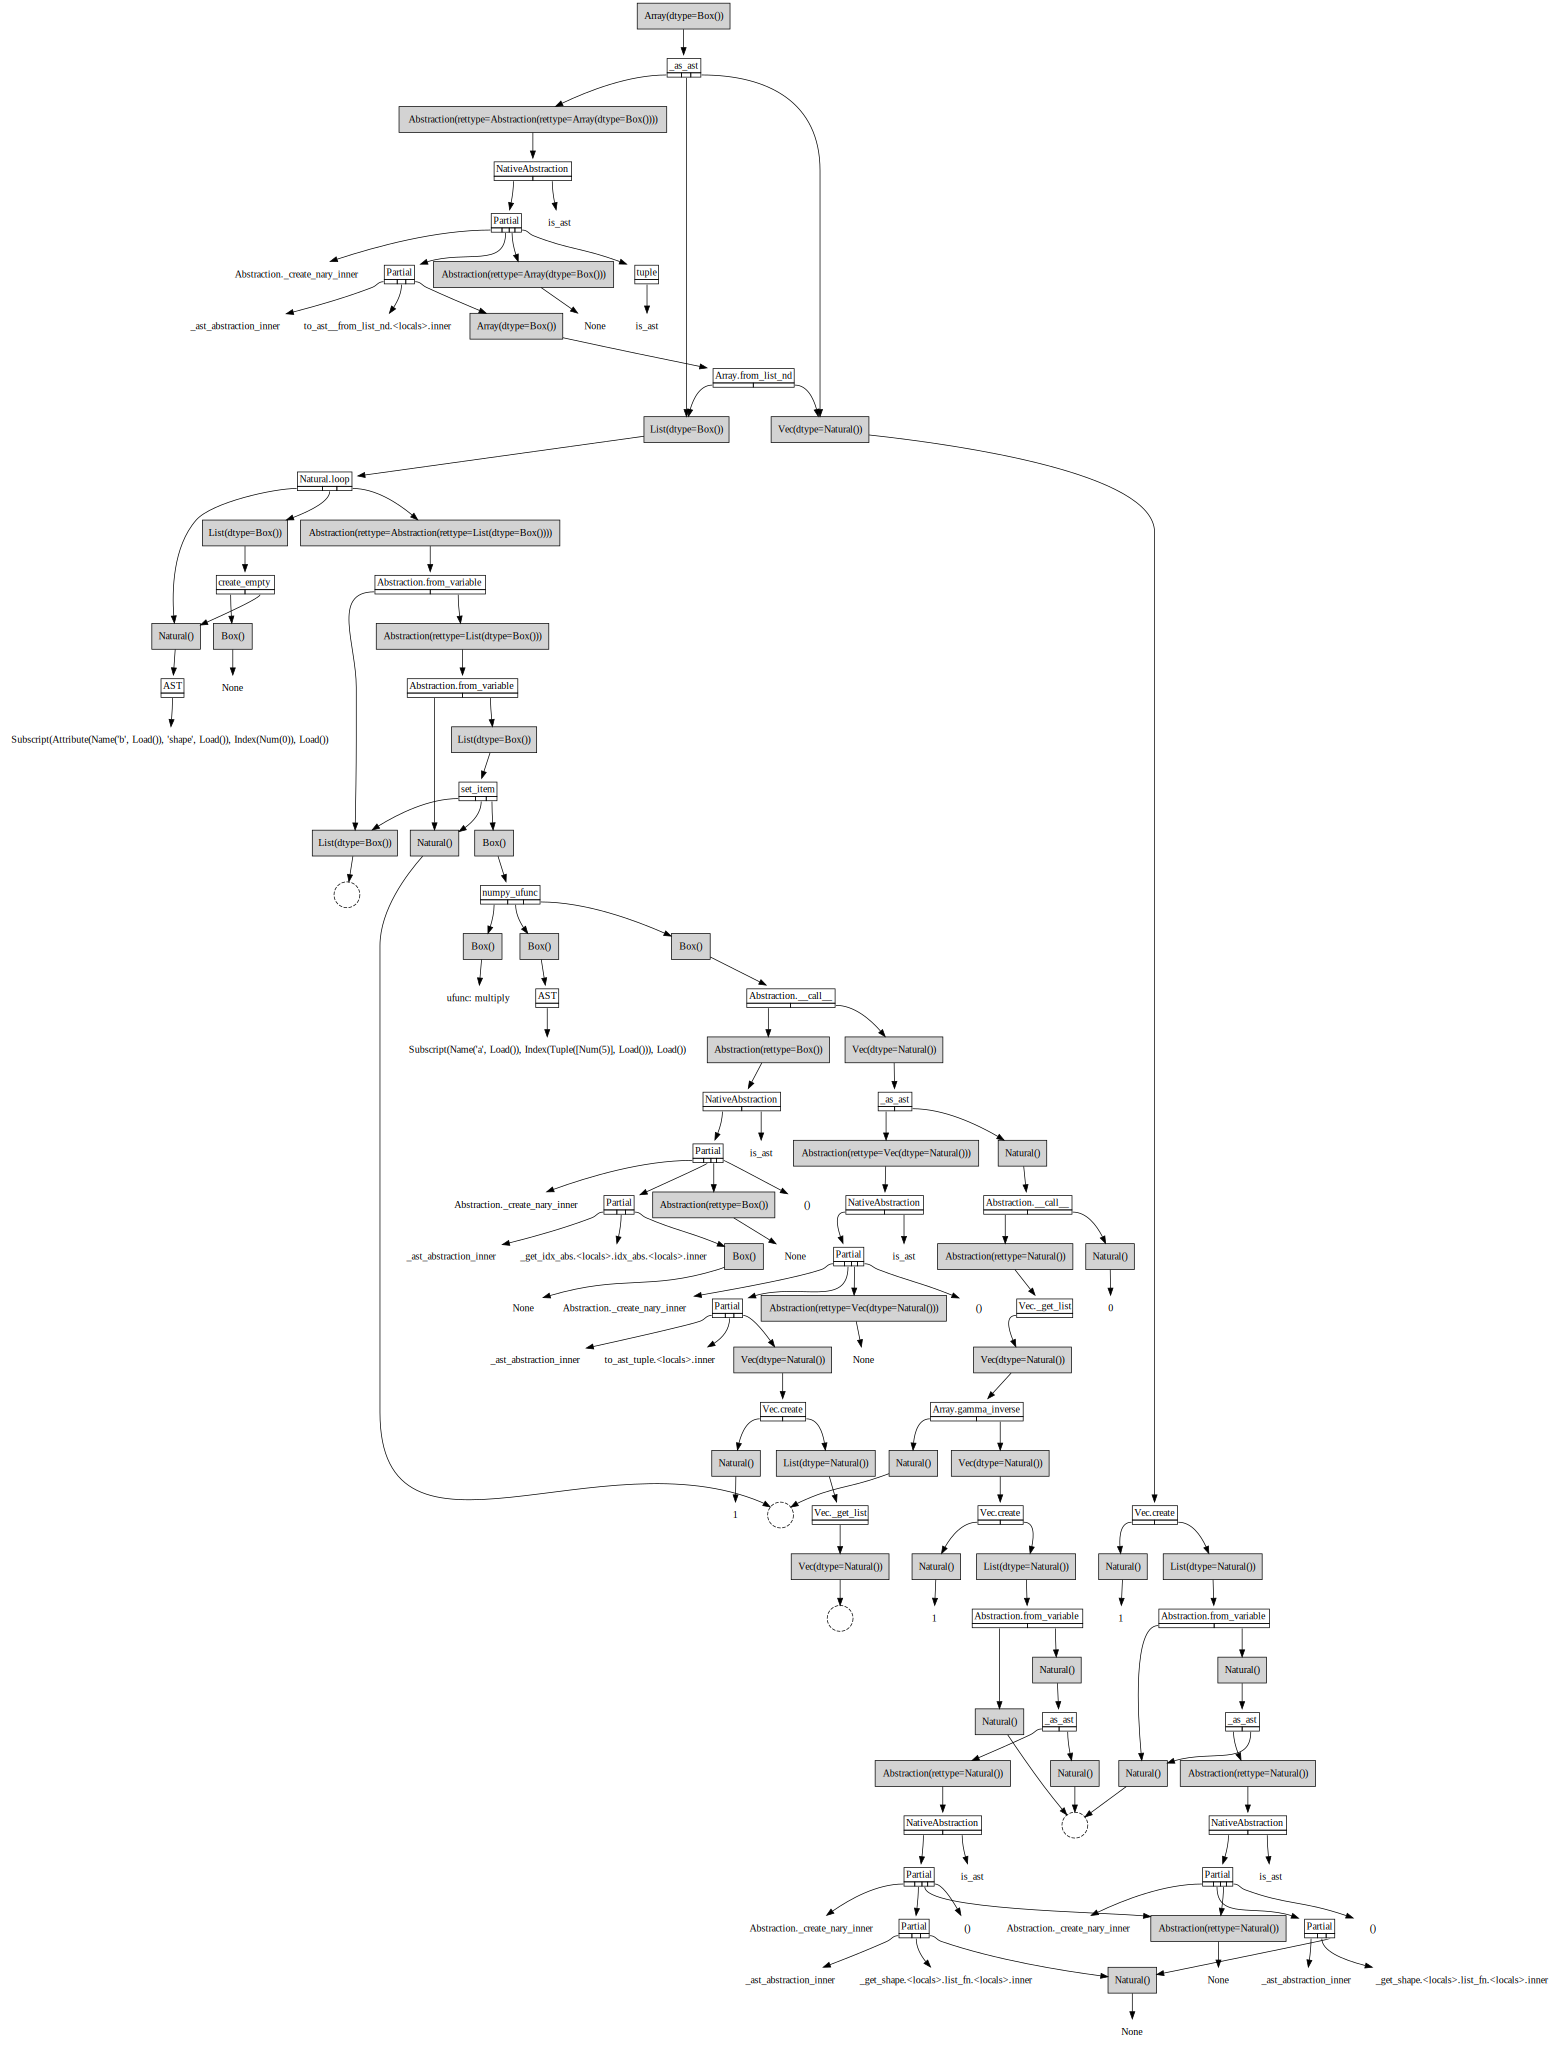

NotImplementedError: Couldn't compile to AST

In [4]:
optimized_some_fn = jit(1, 1)(some_fn)
optimized_some_fn(*args)

In [7]:
%timeit optimized_some_fn(*args)

42.4 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
numba_opt = numba.njit(optimized_some_fn)
numba_opt(*args)

array([    0,     5,    10, ..., 49985, 49990, 49995])

In [9]:
%timeit numba_opt(*args)

66.6 µs ± 7.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Let's look at how this is done! First, we create an abstract representation of the array operations:

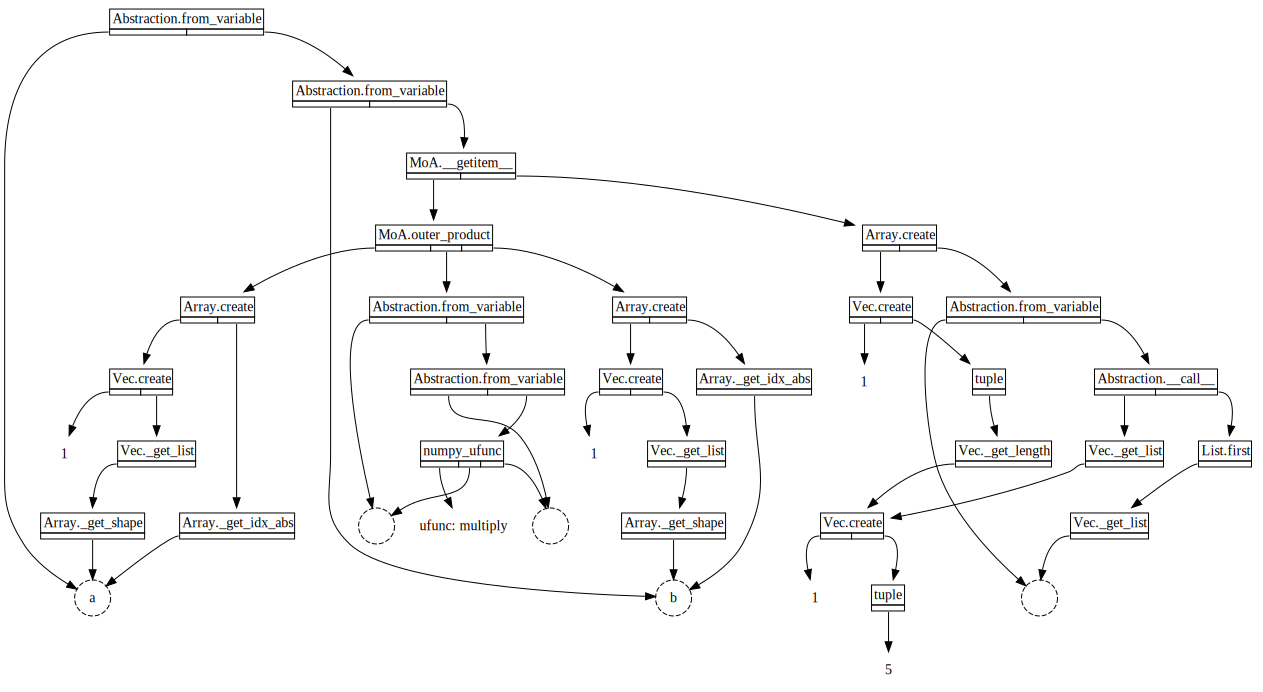

In [6]:
display_ops(optimized_some_fn.orig_res)

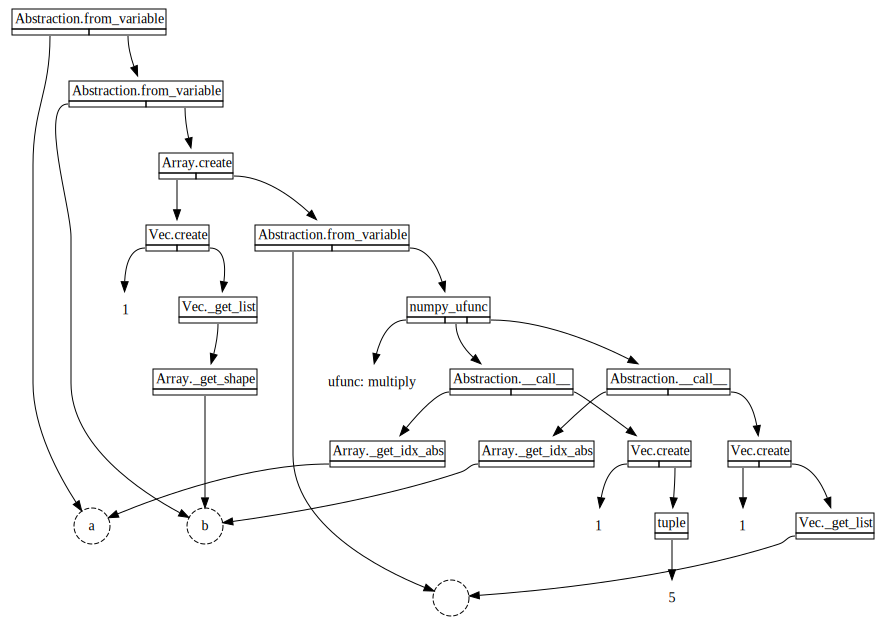

In [7]:
display_ops(optimized_some_fn.res)

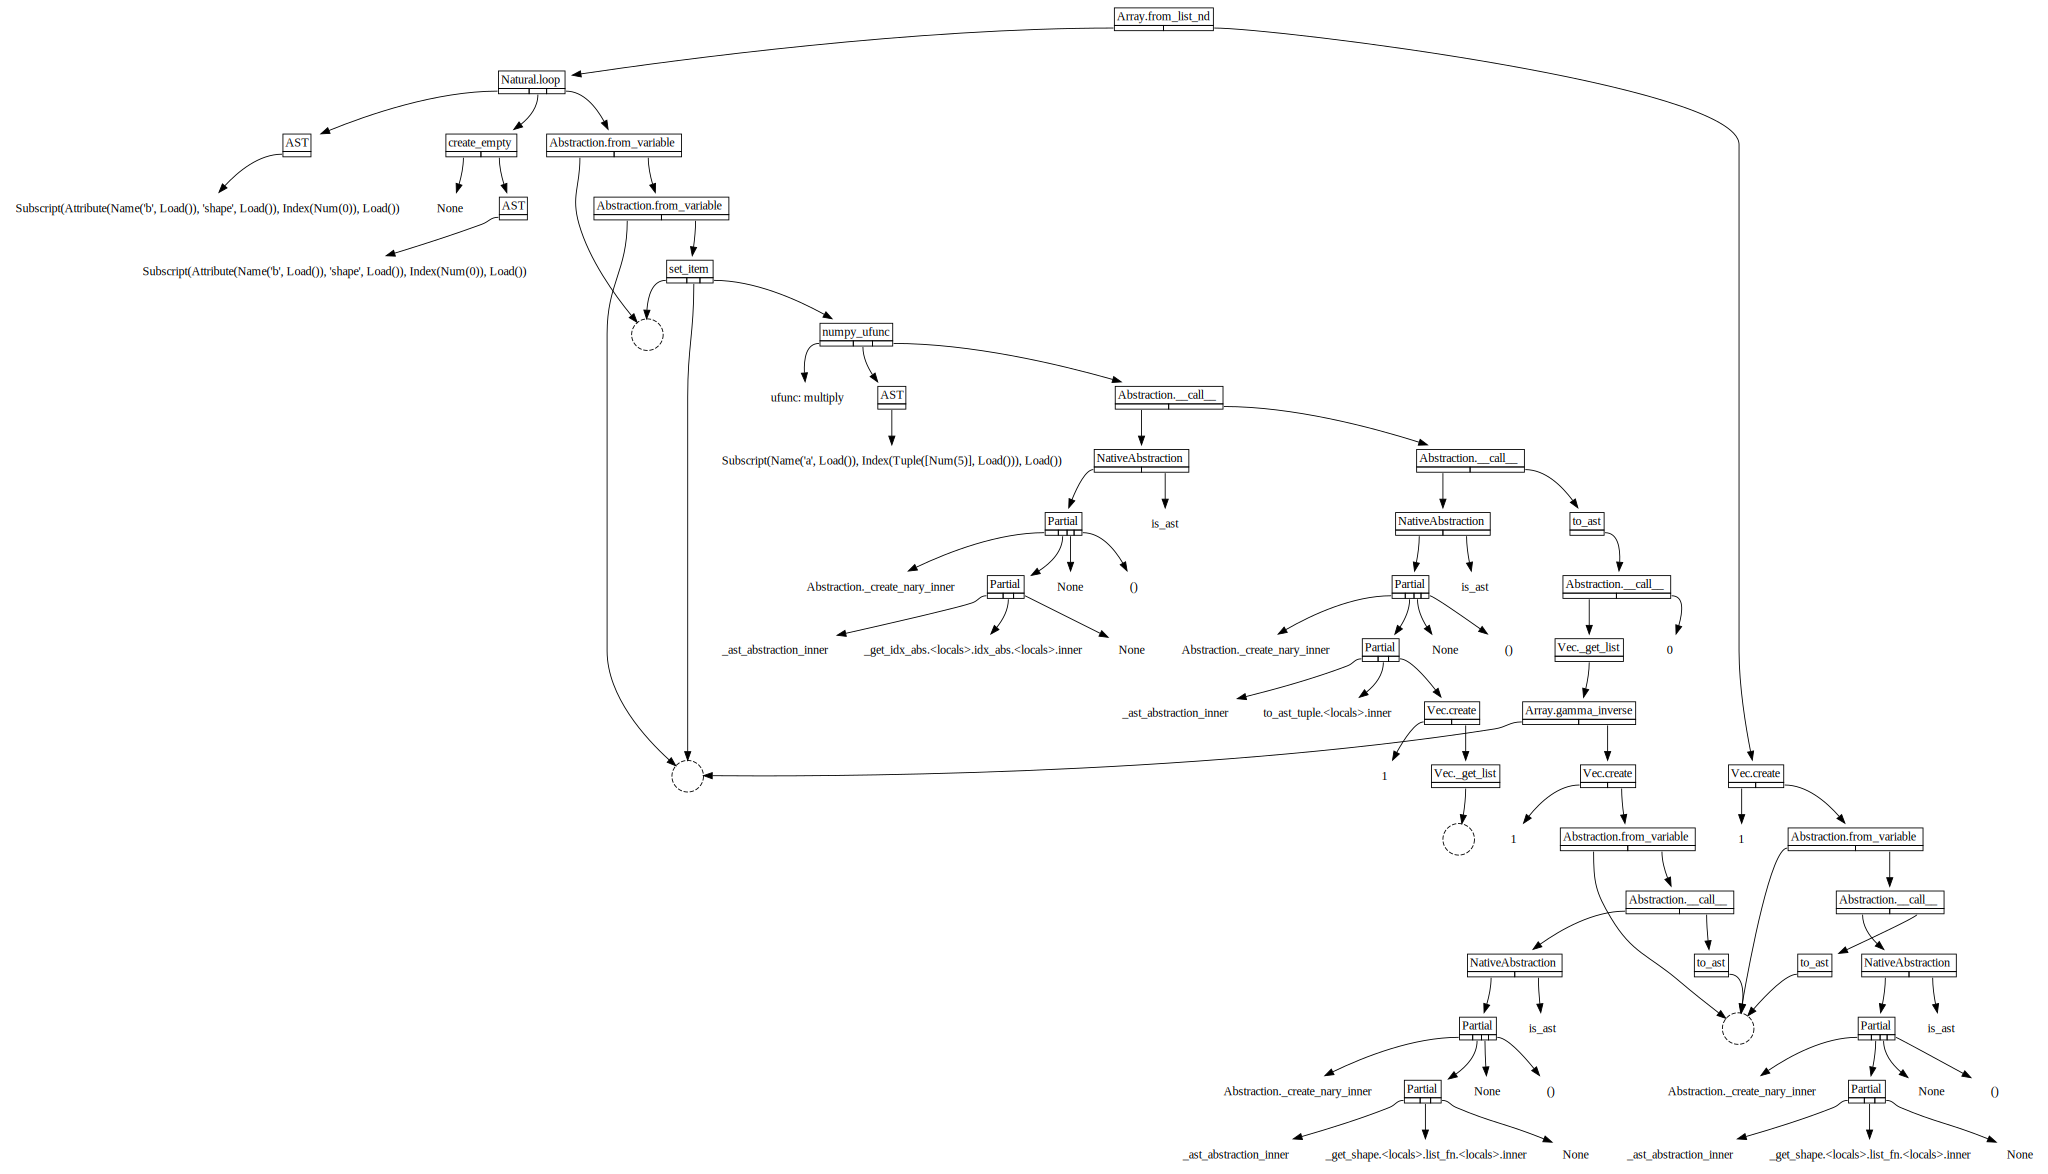

In [8]:
display_ops(optimized_some_fn.new_res)

Then, we compile that to Python AST:

In [6]:
print(optimized_some_fn.source)



def fn(a, b):
    v3 = numpy.empty(b.shape[0], dtype=numpy.int64)
    for v2 in range(b.shape[0]):
        v3[v2] = numpy.multiply(a[(5,)], b[((v2 % b.shape[(0 - 0)]),)])
        v3 = v3
    return v3.reshape((b.shape[0],))

